In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('gemstone.csv')

In [3]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [5]:
df.columns.dtype

dtype('O')

In [6]:
df.columns=df.columns.str.strip()

In [7]:
feature_with_null=[feature for feature in df.columns if df[feature].isnull().sum()>1]

In [8]:
feature_with_null

[]

In [9]:
### There are no value present in our dataset

In [10]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [11]:
df.drop('id',axis=1,inplace=True)

In [12]:
numerical_feature=[feature for feature in df.columns if df[feature].dtype!='O']

In [13]:
discrete_feat=[feature for feature in numerical_feature if len(df[feature].unique())<25]

In [14]:
discrete_feat

[]

In [15]:
### There are no discrete feature

In [16]:
numerical_feature

['carat', 'depth', 'table', 'x', 'y', 'z', 'price']

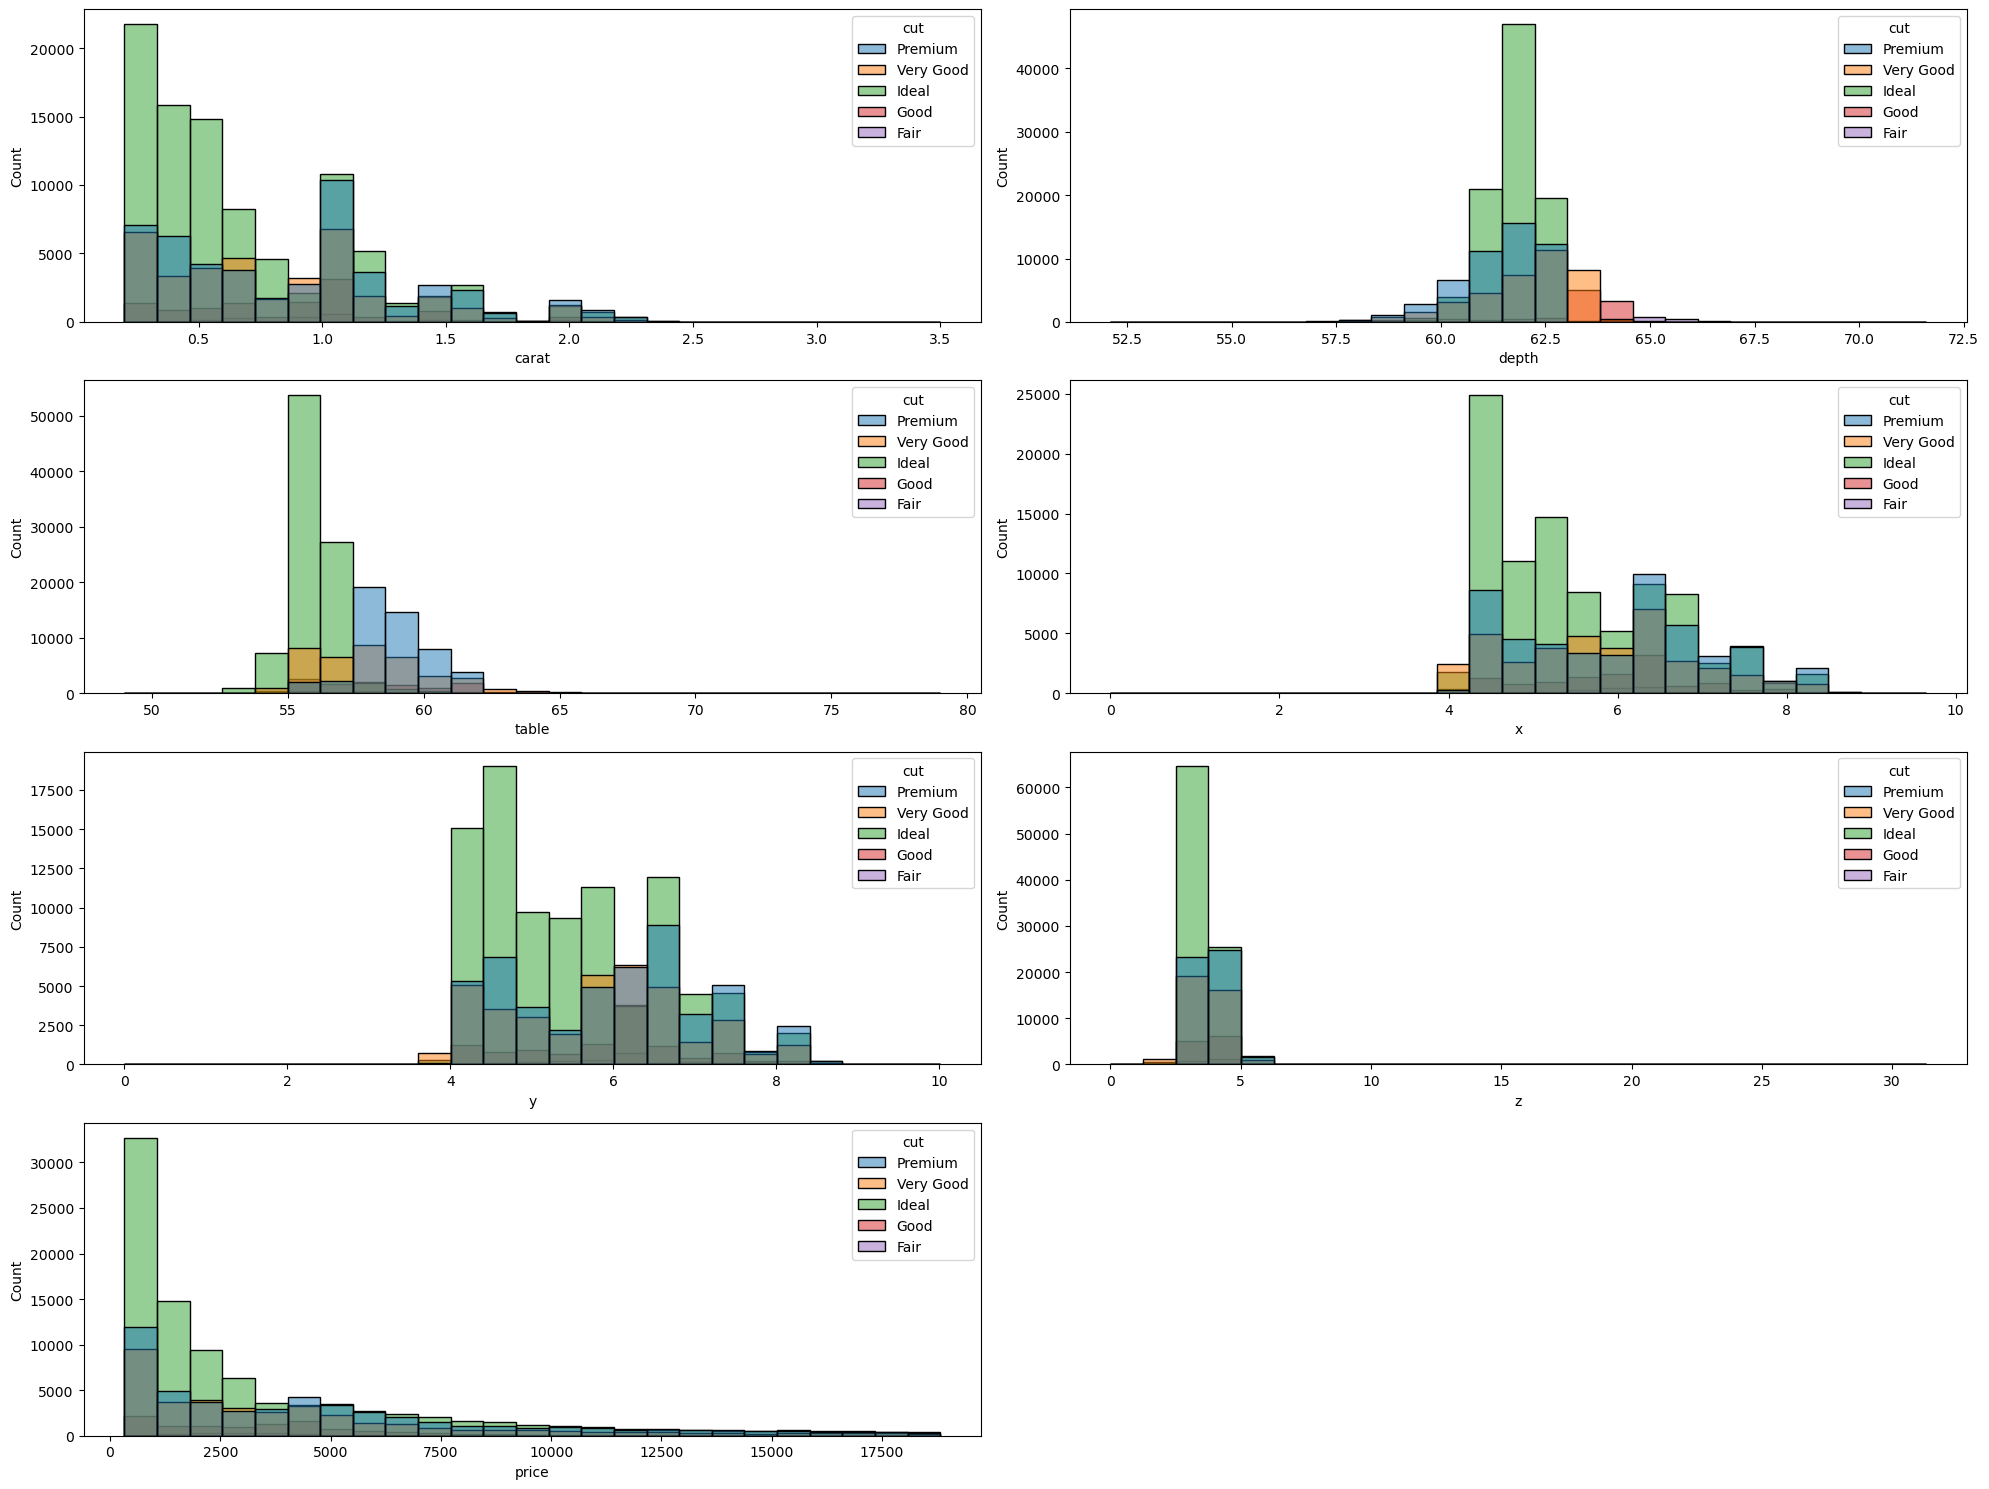

In [17]:
plt.figure(figsize=(20,15))
for i,feature in enumerate(numerical_feature,1):
    plt.subplot(4,2,i)
    data=df.copy()
    sns.histplot(data=data,x=feature,bins=25,color='#FF69B4',hue='cut',)
plt.tight_layout()
plt.show()

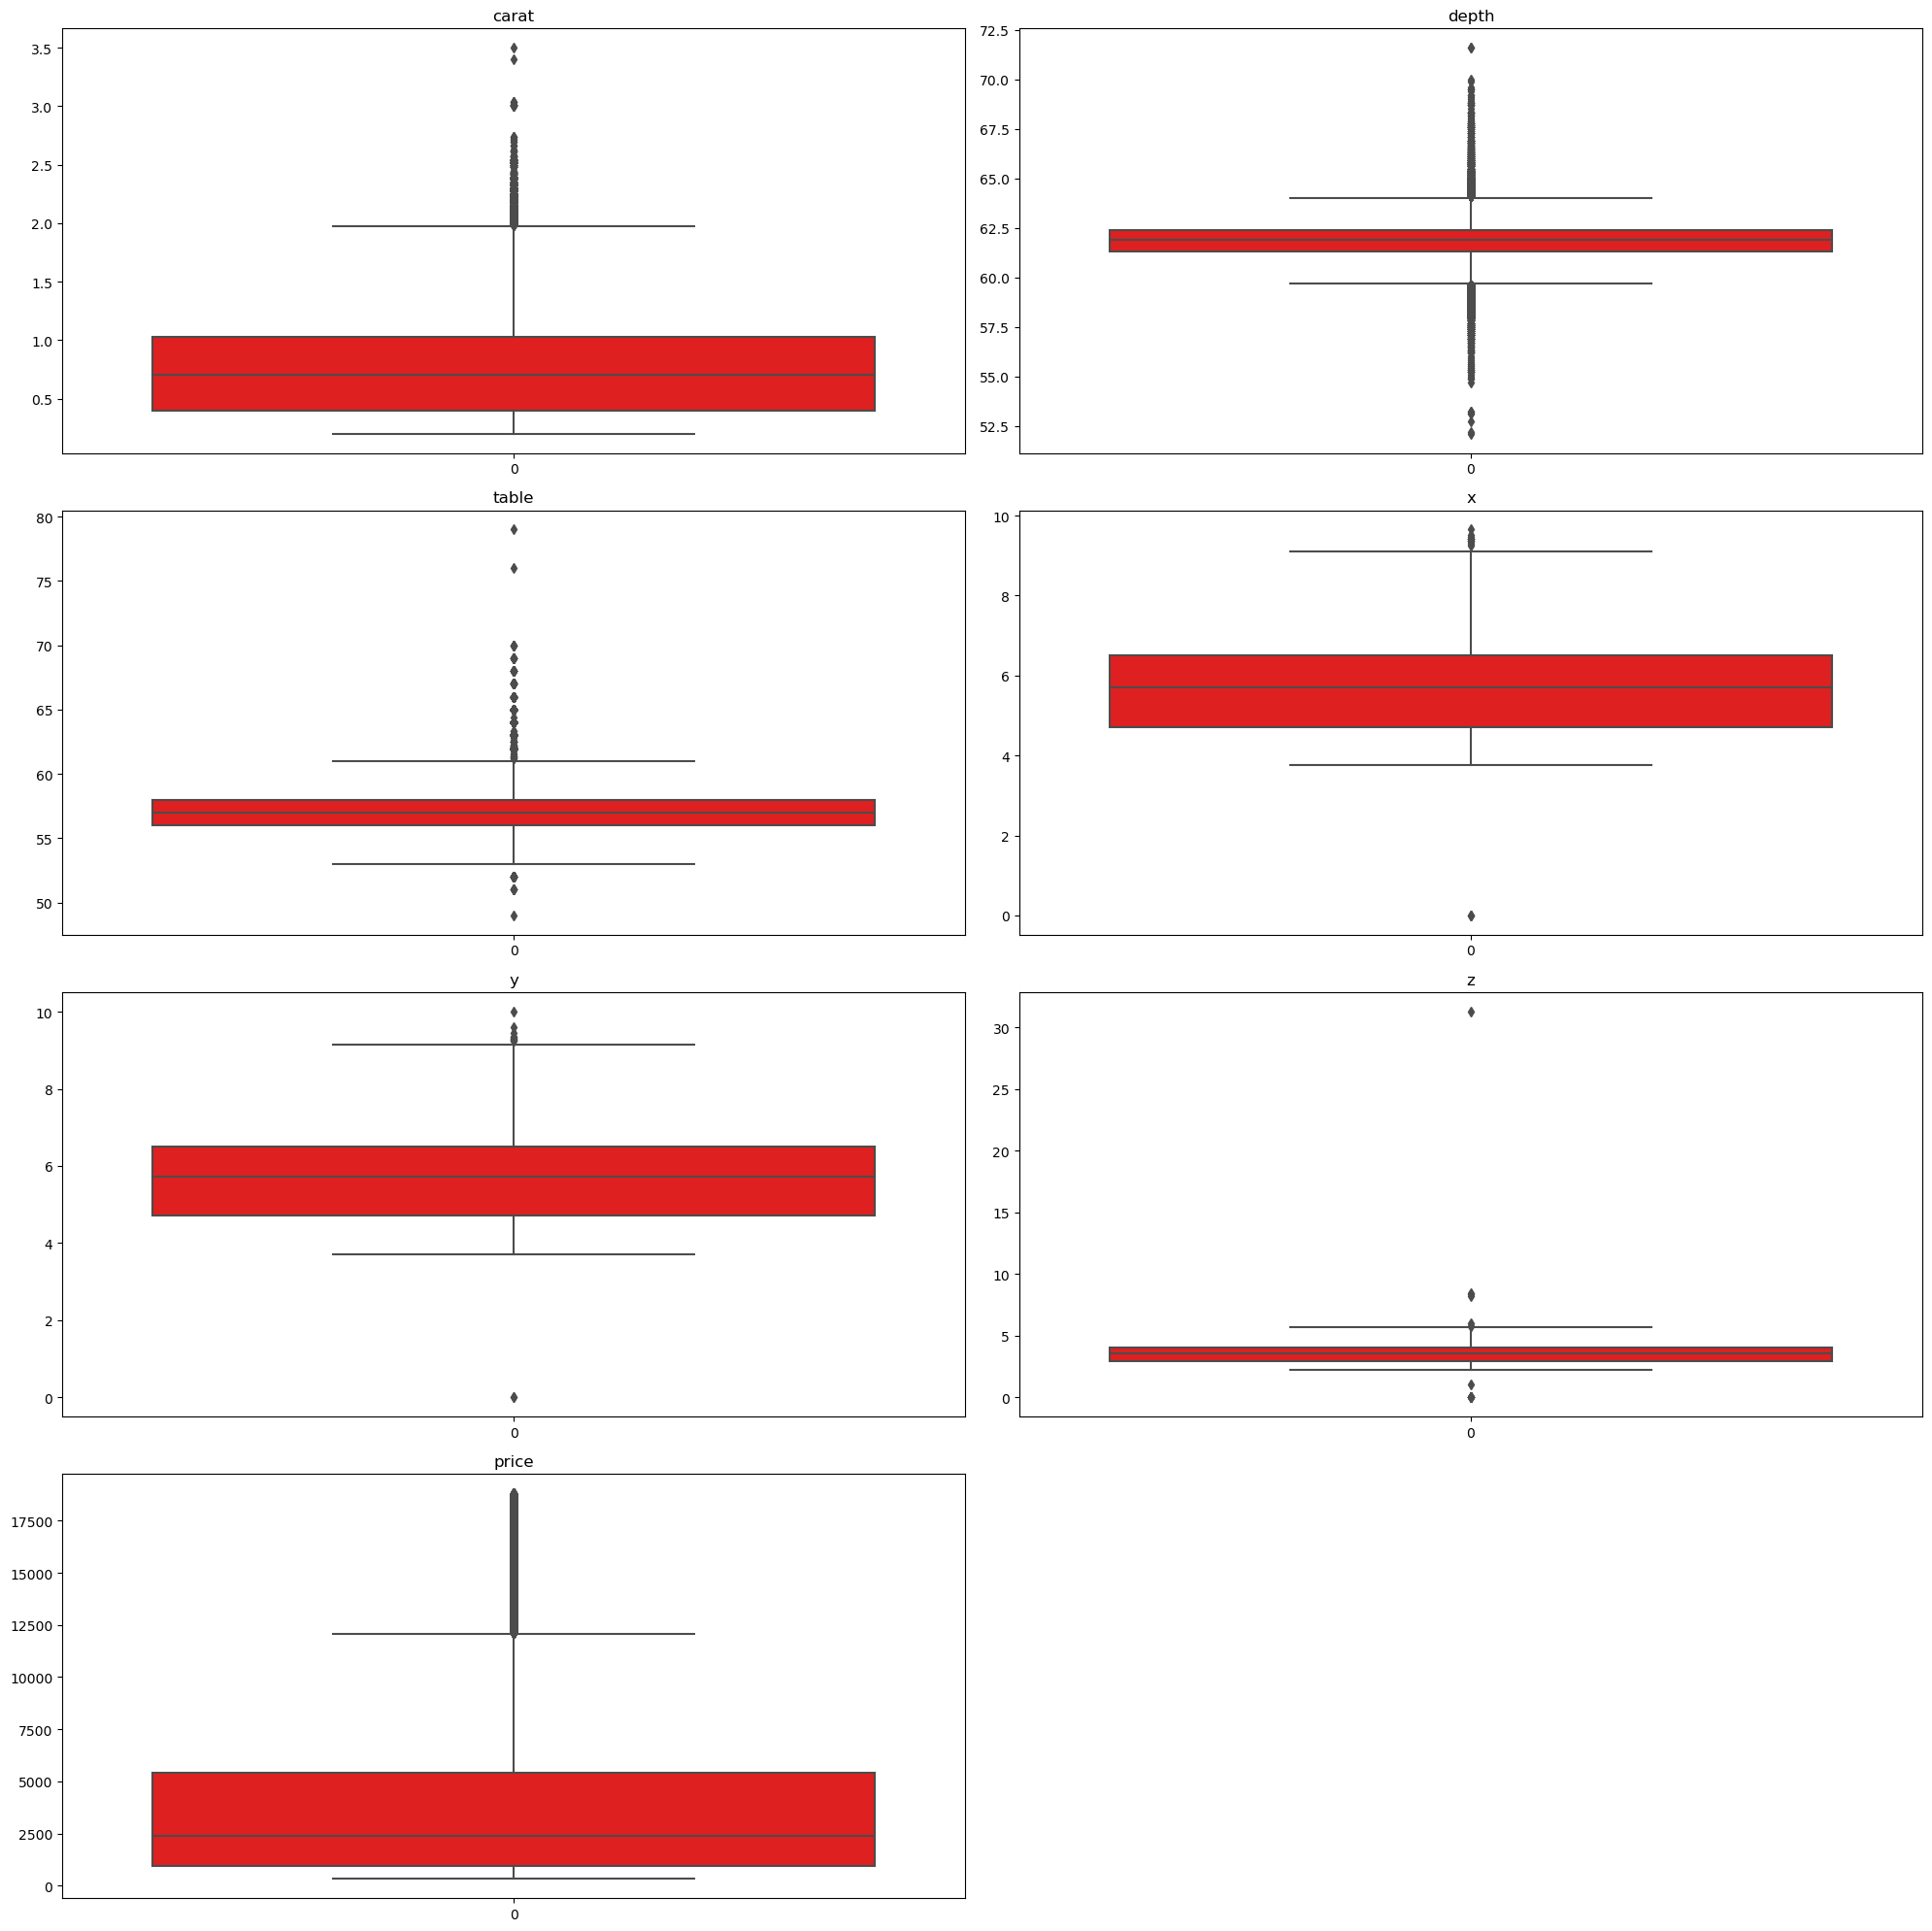

In [18]:
plt.figure(figsize=(20,20))
for i,feature in enumerate(numerical_feature,1):
    plt.subplot(4,2,i)
    data=df.copy()
    sns.boxplot(data[feature],color='r')
    plt.title(feature)
plt.tight_layout()
plt.show()

In [19]:
### There are many outlier in our dataset

In [20]:
categorical_feat=[feature for feature in df.columns if df[feature].dtype=='O']

In [21]:
categorical_feat

['cut', 'color', 'clarity']

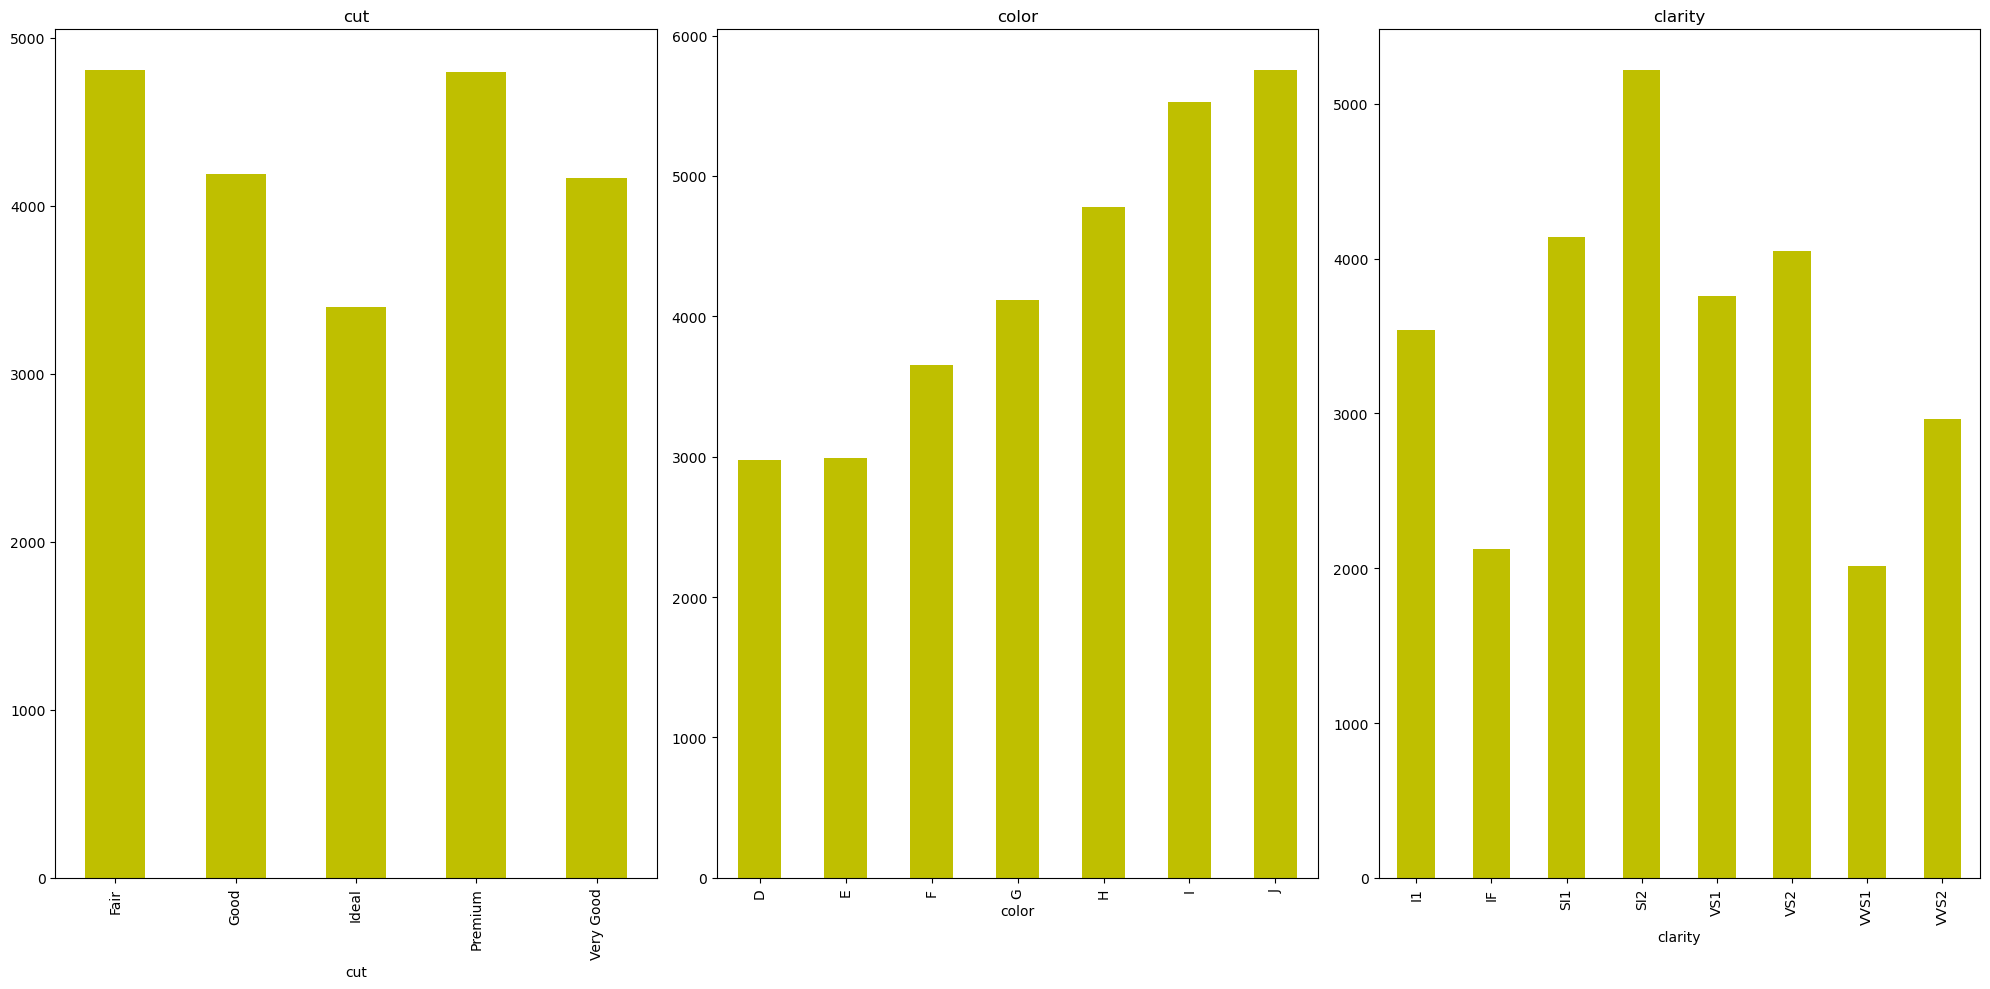

In [24]:
plt.figure(figsize=(20,10))
for i,feature in enumerate(categorical_feat,1):
    plt.subplot(1,3,i)
    data=df.copy()
    data.groupby(feature)['price'].mean().plot(kind='bar',color='y')
    plt.title(feature)
plt.tight_layout()
plt.show()